In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import random

In [8]:
def dfs(graph, start, end, path=None, visited=None, all_visited=None):
    if path is None:
        path = [start]
    else:
        path = path + [start]
    if visited is None:
        visited = set([start])
    else:
        visited.add(start)
    if all_visited is None:
        all_visited = set([start])
    else:
        all_visited.add(start)

    if start == end:
        return path, all_visited

    neighbors = list(graph[start])
    random.shuffle(neighbors)  # Randomize the order of neighbors
    for neighbor in neighbors:
        if neighbor not in visited:
            new_path, new_all_visited = dfs(graph, neighbor, end, path, visited.copy(), all_visited)
            if new_path:
                return new_path, new_all_visited
    return None, all_visited


In [9]:
def create_graph(maze):
    graph = {}
    for i, row in enumerate(maze):
        for j, cell in enumerate(row):
            if cell == 0:  # Only consider paths, not walls
                graph[(i, j)] = []
                for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                    ni, nj = i + direction[0], j + direction[1]
                    if 0 <= ni < len(maze) and 0 <= nj < len(maze[0]) and maze[ni][nj] == 0:
                        graph[(i, j)].append((ni, nj))
    return graph

In [10]:
def visualize_path(maze, path, all_visited, start, end):
    maze_np = np.array(maze)
    # Mark all visited nodes first
    for node in all_visited:
        maze_np[node[0]][node[1]] = 3  # Mark as visited (grey)

    # Overlay the successful path
    for node in path:
        maze_np[node[0]][node[1]] = 2  # Marking the path (green)

    # Mark start and end
    maze_np[start[0]][start[1]] = 4  # Start (blue)
    maze_np[end[0]][end[1]] = 5  # End (red)

    # Custom color map
    cmap = ListedColormap(['white', 'black', 'green', 'grey', 'blue', 'red'])
    
    # Plotting
    fig, ax = plt.subplots()
    ax.imshow(maze_np, cmap=cmap, interpolation='nearest', norm=plt.Normalize(vmin=0, vmax=5))
    ax.grid(which='major', color='grey', linestyle='-', linewidth=0.5)
    ax.set_xticks(np.arange(-0.5, len(maze[0]), 1))
    ax.set_yticks(np.arange(-0.5, len(maze), 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.show()


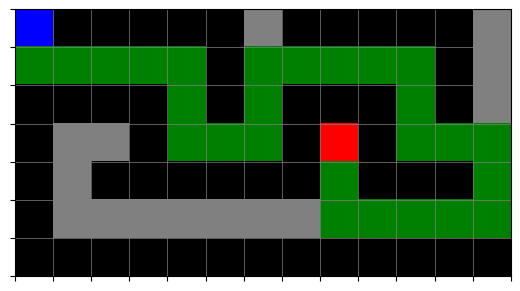

In [11]:
# Your existing maze and graph creation
maze = [
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]
graph = create_graph(maze)
start, end = (0, 0), (3, 8)
path, all_visited = dfs(graph, start, end)

if path:
    visualize_path(maze, path, all_visited, start, end)
else:
    print("No path found")
